#### For this Assignment you have been given a data which is a subset of a bigger dataset which was collected by Buffalo Tax department. It contains information regarding the various properties in Buffalo.

Number of Instances: 92508

Number of Attributes: 16 (including the target variable)

Attribute Information:

| Column Name                | Description                                                                                                                                      | Type        |
|----------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------|-------------|
| TOTAL VALUE                | The combined assessed value of the land and improvements on the parcel                                                                           | Number      |
| FRONT                      | The width of the front of property (in feet)                                                                                                     | Number      |
| DEPTH                      | The depth of the property (in feet)                                                                                                              | Number      |
| PROPERTY CLASS             | Property Type Classification Codes describe the primary use of each parcel of real property on the assessment roll                               | Number      |
| LAND VALUE                 | The assessed value of the land                                                                                                                   | Number      |
| SALE PRICE                 | The price that the parcel of real property was last sold for                                                                                     | Number      |
| YEAR BUILT                 | The year the primary building on the parcel was built                                                                                            | Number      |
| TOTAL LIVING AREA          | The amount of living space (in square feet)                                                                                                      | Number      |
| OVERALL CONDITION          | A grade of the condition of the property                                                                                                         | Number      |
| BUILDING STYLE             | A code for the style of building                                                                                                                 | Number      |
| HEAT TYPE                  | The type of heating system in the building (only applicable to residential properties)                                                           | Number      |
| BASEMENT TYPE              | The type of basement on the property (only applicable to residential properties)                                                                 | Number      |
| # OF STORIES               | The number of floors/Stories in the property                                                                                                     | Number      |
| # OF FIREPLACES            | The number of fireplaces in a dwelling (only applicable to residential properties)                                                               | Number      |
| # OF BEDS                  | The number of beds in a dwelling (only applicable to residential properties)                                                                     | Number      |
| # OF BATHS                 | The number of baths in a dwelling (only applicable to residential properties)                                                                    | Number      |
| # OF KITCHENS              | The number of kitchens in a dwelling (only applicable to residential properties)                                                                 | Number      |



There are no missing Attribute Values.

Your task is to implement a Linear Regression Model to predict the TOTAL VALUE of a property

In [397]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

%matplotlib inline

#### STEP 1 - Load Data (Already Done)

In [398]:
df = pd.read_csv('data.csv', dtype=np.float64)

In [399]:
y = np.asarray(df['TOTAL VALUE'] )
y = y.reshape(y.shape[0],1)
feature_cols = df.columns.to_list()
feature_cols.remove('TOTAL VALUE')
x = np.asarray(df[feature_cols])

Variable **y** contains the total values of the property

Variable **x** contains the features

#### STEP 2 - Split the Data into training and testing and validation split ( 70% Training, 20% Testing and 10% validation) ( Hint: you can use the sklearn library for this step only) ( 5 Points)

In [400]:
#STEP 2

# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 40)


# Train-Validation Split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.125, random_state = 38)

#### STEP 3 - Scale Data Using Min Max Scaler (10 Points)
For each feature scaled value can be calculated using $  x_{scaled} = \frac{x - min(x)}{max(x) - min(x)}$


In [401]:
#STEP 3

# Scaling Training samples
for i in range(15):
    x_train[:,i] = (x_train[:,i] - np.amin(x_train, axis=0)[i])/(np.amax(x_train, axis=0)[i] - np.amin(x_train, axis=0)[i])

# Scaling Validation samples
for i in range(15):
    x_val[:,i] = (x_val[:,i] - np.amin(x_val, axis=0)[i])/(np.amax(x_val, axis=0)[i] - np.amin(x_val, axis=0)[i])

# Scaling Testing samples
for i in range(15):
    x_test[:,i] = (x_test[:,i] - np.amin(x_test, axis=0)[i])/(np.amax(x_test, axis=0)[i] - np.amin(x_test, axis=0)[i])
    

#### STEP 4 - Initialize values for the weights, No. of Epochs and Learning Rate (5 Points)

In [402]:
#STEP 4

# Initializing Weights, Epochs, learning rate
weights = np.random.randn(16,1)
epochs = 800
learning_rate = 0.01


#### STEP 5 - Train Linear Regression Model (40 Points)
 5.1 Start a Loop For each Epoch
 
 5.2 Find the predicted value using $ y(x,w) = w_0 + w_1x $ for the training and validation splits (10 Points)
 
 5.3 Find the Loss using Mean Squared Error for the training and validation splits and store in a list (10 Points)
 
 5.4 Calculate the Gradients (15 Points)
 
 5.5 Update the weights using the gradients (5 Points)

In [403]:
# STEP 5

# Initializing placeholders for noting training & validation loss
loss_train = []
loss_val = []

# For loop to iterate and implement 'Gradient Descent Algorithm' 
for i in range(epochs):
     
    
    # Calculate Mean Squared error for the given epoch on training samples & append it to the list
    MSE_train = np.power(np.sum(x_train.dot(weights[1:]) + weights[0] - y_train),2)/y_train.shape[0]
    loss_train.append(MSE_train)
    
    # Calculate Mean Squared error for the given epoch on validation samples & append it to the list
    MSE_val = np.power(np.sum(x_test.dot(weights[1:]) + weights[0] - y_test),2)/y_test.shape[0]
    loss_val.append(MSE_val)
        
    # Calculate gradient for coefficients except 'weights[0]' (bias term)
    delta = 2/y_train.shape[0] * x_train.T.dot(x_train.dot(weights[1:]) + weights[0] - y_train)
    
    # Update weights according to calculated gradient [update for 'weights[0]' (bias term) is different]
    weights[1:] = weights[1:] - learning_rate * delta
    weights[0] = weights[0] - learning_rate * 2/y_train.shape[0] * np.sum(x_train.dot(weights[1:]) + weights[0] - y_train)
    
    

#### STEP 6 - Evaluate the Model ( 25 Points)
6.1 Plot a graph of the Training and Validation Loss wrt epochs (10 Points)

6.2 Find the R2 Score of the trained model for the Train, Test and Validation splits (15 Points)

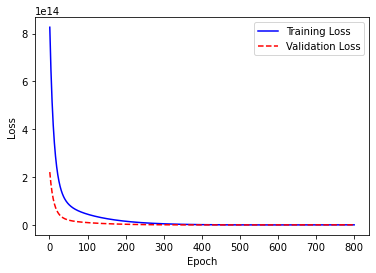

R2 score on training samples: {} 0.8347717436863624
R2 score on validation samples: {} 0.3708724159210596
R2 score on test samples: {} 0.8266049558383207


In [404]:
# STEP 6

# Plotting the previously gathered loss functions for training & testing samples
epochs = range(1, len(loss_train) + 1)
plt.plot(epochs, loss_train, 'b-')
plt.plot(epochs, loss_val, 'r--')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()



# Calculating mean of target variable for training, validation & test samples
y_mean = np.sum(y_train)/y_train.shape[0]
y_mean_val = np.sum(y_val)/y_val.shape[0]
y_mean_test = np.sum(y_test)/y_test.shape[0]

# Calculating R2 Score of the trained model for the training data
ss_t = np.sum(np.power((y_train - y_mean),2))
ss_res = np.sum(np.power(np.sum(x_train.dot(weights[1:]) + weights[0] - y_train),2))
r2_score = 1 - (ss_res/ss_t)

# Calculating R2 Score of the trained model for the validation data
ss_t_val = np.sum(np.power((y_val - y_mean_val),2))
ss_res_val = np.sum(np.power(np.sum(x_val.dot(weights[1:]) + weights[0] - y_val),2))
r2_score_val = 1 - (ss_res_val/ss_t_val)

# Calculating R2 Score of the trained model for the test data
ss_t_test = np.sum(np.power((y_test - y_mean_test),2))
ss_res_test = np.sum(np.power(np.sum(x_test.dot(weights[1:]) + weights[0] - y_test),2))
r2_score_test = 1 - (ss_res_test/ss_t_test)

print("R2 score on training samples: {}",r2_score)
print("R2 score on validation samples: {}",r2_score_val)
print("R2 score on test samples: {}",r2_score_test)